In [172]:
# import data
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [173]:
# create session
import tensorflow as tf
sess = tf.Session()
from keras import backend as K
K.set_session(sess)
K.set_learning_phase(1)

In [174]:
# create nodes
img_raw = tf.placeholder(tf.float32, shape=[None, 784])
labels = tf.placeholder(tf.float32, shape=[None, 10])
img = tf.reshape(img_raw, shape=[-1, 28, 28, 1])

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
x = Conv2D(32, (3, 3), padding='same', activation='relu')(img)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(256, activation='softmax')(x)
predictions = Dense(10, activation='softmax')(x)

In [175]:
# create learning parameters
from keras.objectives import categorical_crossentropy
#error = tf.reduce_mean(categorical_crossentropy(labels, predictions))
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=predictions))
global_step = tf.Variable(0, trainable=False)

In [176]:
# init network
init = tf.global_variables_initializer()
sess.run(init)

In [177]:
# training parameters and setup
BATCH_SIZE = 100
ITERATIONS = 1000
LEARNING_RATE = 0.5

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros(0)
y = np.zeros(0)


<IPython.core.display.Javascript object>


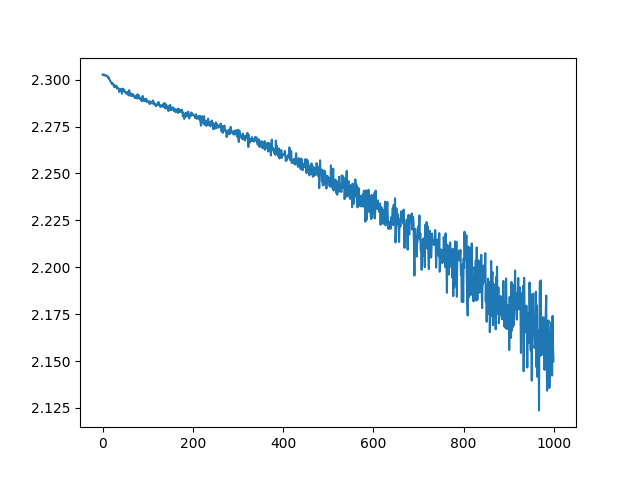

In [178]:
# train
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

learning_rate = tf.train.exponential_decay(LEARNING_RATE, global_step, BATCH_SIZE * ITERATIONS, 0.96, staircase=True)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(error, global_step=global_step)

start_time = time.time()
with sess.as_default():
    for i in range(ITERATIONS):
        batch = mnist_data.train.next_batch(BATCH_SIZE)
        _, err = sess.run([train_step, error], feed_dict={
            img_raw: batch[0],
            labels: batch[1]
        })
        
        x = np.append(x, i)
        y = np.append(y, err)
        ax.clear()
        ax.plot(x, y)
        fig.canvas.draw()

print("time elapsed " + str(time.time() - start_time) + "ms")

In [179]:
# evaluate
TEST_SIZE = 100
from keras.metrics import categorical_accuracy as accuracy
acc_values = accuracy(labels, predictions)

K.set_learning_phase(0)
with sess.as_default():
    results = acc_values.eval(feed_dict={
        img_raw: mnist_data.test.images[:TEST_SIZE],
        labels: mnist_data.test.labels[:TEST_SIZE]
    })
print(np.mean(results))

0.62
